### 여러 특성 사용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl 
import math
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr

import sys
sys.path.append("../")

%matplotlib inline
%load_ext autoreload
%autoreload 2

C:\Users\a\AppData\Local\Temp\ipykernel_17036\543091302.py:9: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [2]:
## boston 부동산 관련 데이터
from sklearn.datasets import fetch_openml

boston= fetch_openml(name="boston", version=1, parser='auto')
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
dataset['CHAS']=dataset['CHAS'].astype('float64')
dataset['RAD']=dataset['RAD'].astype('float64')

In [3]:
observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.iloc[:, :-1]
y = dataset['target'].values
print("Size of boston dataset: {}".format(observations))

Size of boston dataset: 506


In [4]:
Xc = sm.add_constant(X)     # 편향 벡터(단위값을 가진 상수 변수)를 포함하는 열을 추가한 후 Xc라고 명명해 입력 행렬 준비
Xc

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
linear_regression = sm.OLS(y,Xc)

In [6]:
fitted_model = linear_regression.fit()

In [7]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          6.72e-135
Time:                        14:22:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 공식을 대안으로 사용

In [8]:
linear_regression = smf.ols(formula = 'target ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=dataset)
linear_regression

In [9]:
fitted_model = linear_regression.fit()
fitted_model

##### Adj. R-squared : 다중회귀에서는 이 측정치가 더 중요하다
##### 표준 R과 조정된 R 사이의 비율을 측정해보자. 차이가 20%를 초과하면 모델에 중복 변수가 있으므로 문제가 발생할 수 있다.
##### 한 번에 많은 변수로 작업하는 경우 계수에 중요한 경고가 있는지 확인해야 한다.(T-TEST 사용, P값이 낮은 변수는 모델에서 제거 가능)
##### Condition Number 테스트: 불안정성(다중공산성) 확인 - 30을 초과하면 신뢰도가 낮아짐

### 상관행렬

##### 다중회귀에서는 예측변수의 분산과 목표변수의 분산 사이의 관계가 고유한지, 공유된 것인지 구분해야 한다
##### 고유 - 부분상관관계 / 공유 - 한 개의 변수와 데이터셋의 다른 변수에 동시에 존재하는 정보의 양(공산성 & 다중공산성)
##### 서로 영향을 미치는 예측변수의 수와 방법을 결정하기 위해서는 상관관계 행렬을 사용해야 한다

In [10]:
X = dataset.iloc[:, :-1]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
correlation_matrix = X.corr()
correlation_matrix  # 개략적으로 DIS-TAX, NOX, INDUS 사이의 상관관계가 높음

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


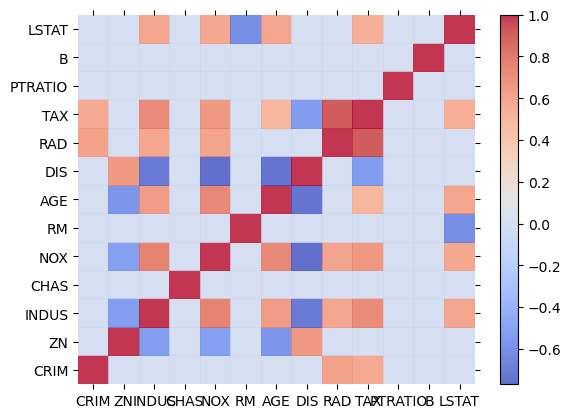

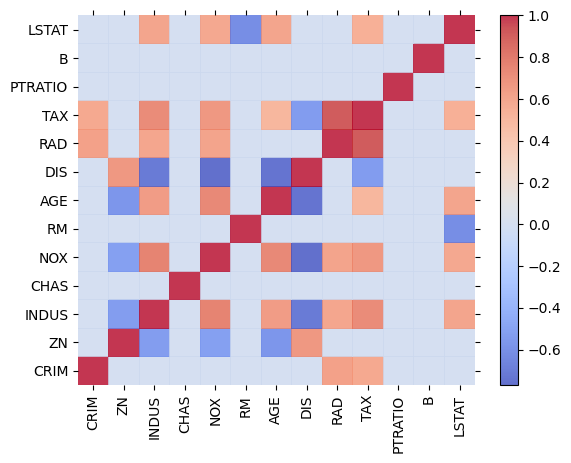

In [12]:
# 상관관계 히트맵 작성
def visualize_correlation_matrix(data, hurdle = 0.0):                       # hurdle - 상관계수의 절대값이 이 0.0보다 작으면 0으로 설정
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R) < hurdle)] = 0.0                                   # 절대값 필터링
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)                # plt.pcolor: 상관행렬 R을 색상으로 표현 / cmap: 색상 맵 / alpha: 투명도
    heatmap.axes.set_frame_on(False)                                        # 프레임 제거 / 축 설정
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off')   # 축 눈금 숨기기 
    plt.colorbar()                                                                                 # 색상 바 추가
    plt.show()
    
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(X, hurdle=0.5)

##### 빨간색의 정도가 강한 것이 상관관계가 강한 것임을 직관적으로 알 수 있다

In [13]:
# 고유벡터/고유값 사용
# 고유벡터 - 새로운 변수가 기존의 변수와 어떻게 연관되어 있는지 나타내는 행렬
# 고유값 각각의 새로운 변수에 대해 재조합된 분산의 정도

corr = np.corrcoef(X, rowvar = 0)                      # X의 상관행렬
eigenvalues, eigenvectors = np.linalg.eig(corr)        # eigenvalues - 고유값   / eigenvectors - 고유벡터

# 고유값 추출 후 내림차순으로 정렬해 0에 가깝거나 다른 요소에 비해 아주 작은 값을 갖는 요소 탐색
# 0에 가까운 값은 정규 방정식 및 행렬 역변환을 기반으로 한 다른 최적화 방법에 대한 문제 나타냄 / 작은 값은 다중공산성의 요인
eigenvalues                                            

array([6.12684883, 1.43327512, 1.24261667, 0.85757511, 0.83481594,
       0.65740718, 0.53535609, 0.39609731, 0.06350926, 0.27694333,
       0.16930298, 0.18601437, 0.22023782])

In [14]:
# 0부터 인덱싱 >> 로드된 모든 변수를 포함하는 고유 벡터에서 특정 벡터 호출 가능
eigenvectors[:,8]         # 인덱싱 8인 고유 벡터 출력 시 현저히 다른 값들 발견 가능

array([-0.0459523 ,  0.08091897,  0.25107654, -0.03592171, -0.04363045,
       -0.0455671 ,  0.03855068,  0.01829854,  0.63348972, -0.72023345,
       -0.02339805,  0.00446307, -0.02443168])

In [15]:
variables[2], variables[8], variables[9]    # 다중공산성의 위험 요소 변수명들 출력

('INDUS', 'RAD', 'TAX')

### 기울기 하강 재방문

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
## 변수 표준화를 사용한 알고리즘
observations = len(dataset)
variables = dataset.columns                # 변수 선택
standardization = StandardScaler()         # 표준화 준비
Xst = standardization.fit_transform(X)     # 데이터 표준화(x-평균 0, 표준편차 1)
original_means = standardization.mean_     # 원본 통계치 평균 저장
original_stds = X.std().values             # 원본 통계치 표준편차 저장
Xst = np.column_stack((Xst, np.ones(observations)))    # 상수항 추가
y = dataset['target'].values               # 타겟 변수 설정

##### 데이터 행렬 적합 / 열 평균 및 표준편차 기록 & 열 데이터 표준화 >> 원래 스케일을 사용해 계수를 다시 계산하고자 할 때 적합 후 사용한 평균 및 표준편차를 추적

In [18]:
import random
import numpy as np
# 주어진 차원 p에 대해 평균 0, 표준편차 1인 정규분포에서 랜덤으로 가중치 벡터 생성
def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

# 행렬 곱셈을 통해 예측값 계산
def hypothesis(X,w):
    return np.dot(X,w)

# 예측값 - 실제값(y) 차이 계산
def loss(X,w,y):
    return hypothesis(X,w) - y

# 손실함수 = 손실 제곱의 값 반환
def squared_loss(X,w,y):
    return loss(X,w,y)**2

# 가중치에 대한 손실 함수의 기울기 계산
def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

# 현재 가중치 w를 기울기와 학습률 alpha을 사용해 업데이트
def update(X,w,y, alpha=0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

# 경시 하강법을 통한 가중치 최적화
# 초기 가중치 랜덤하게 생성, 지정된 반복 횟수(iterations)만큼 가중치 업데이트
# 손실 함수 값이 eta 이내로 수렴하면 최적화 종료 후 현재 가중치 반환
# 진행 상황을 path 리스트에 저장
def optimize(X,y, alpha=0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path
                                  
alpha = 0.01
w, path = optimize(Xst, y, alpha, eta = 10**-12, iterations = 20000)
print ("These are our final standardized coefficients: " + ', '.join(map(lambda x: "%0.4f" % x, w)))

These are our final standardized coefficients: -0.9281, 1.0816, 0.1409, 0.6817, -2.0567, 2.6742, 0.0195, -3.1040, 2.6622, -2.0768, -2.0606, 0.8493, -3.7436, 22.5328


##### 단순선형회귀와 매우 흡사한 코드 / 더 적은 반복 횟수, 더 작은 알파값

#### 비표준화 계수 - 표준화된 계수를 비표준화 계수로 전환

In [19]:
unstandardized_betas = w[:-1] / original_stds     # 비표준화 계수 계산(마지막 상수항 제외)
unstandardized_bias = w[-1] - np.sum((original_means / original_stds) * w[:-1])   # 비표준화 편향 계산
print('%8s: %8.4f' % ('bias', unstandardized_bias))
for beta, varname in zip(unstandardized_betas, variables):     # 비표준화된 계수와 변수명을 짝지어 출력, 원래 단위로 확인 가능
    print('%8s: %8.4f' % (varname, beta))

    bias:  36.4457
    CRIM:  -0.1079
      ZN:   0.0464
   INDUS:   0.0205
    CHAS:   2.6841
     NOX: -17.7490
      RM:   3.8061
     AGE:   0.0007
     DIS:  -1.4741
     RAD:   0.3057
     TAX:  -0.0123
 PTRATIO:  -0.9518
       B:   0.0093
   LSTAT:  -0.5242


### 특성 중요도 평가
##### 1) 주제에 대한 방향성 - 계수의 부호(+/-) 확인 및 다중공산성 파악
##### 2) 모델에 미치는 변수의 영향 - 예측 결과가 변수(특성) 변화에 얼마나 영향을 받는가
##### 3) 변수 중요도 순위 측정 & 단순한 모델 사용

### 1) 표준화된 계수 검사

In [22]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
linear_regression = linear_model.LinearRegression(fit_intercept=True)

In [24]:
standardization = StandardScaler()
stand_coef_linear_reg = make_pipeline(standardization, linear_regression)   
# 회귀분석 이전 데이터 제공 이전 자동으로 수행할 일련의 작업을 설정
# 파이프라인 - 회귀분석 이전 데이터에 대해 통계적 표준화를 실행해 표준화된 계수를 아웃풋으로 출력

In [25]:
linear_regression.fit(X, y)

LinearRegression()

In [26]:
for coef, var in sorted(zip(map(abs, linear_regression.coef_), dataset.columns[:-1]), reverse=True):
    print("%6.3f %s" % (coef, var))

17.767 NOX
 3.810 RM
 2.687 CHAS
 1.476 DIS
 0.953 PTRATIO
 0.525 LSTAT
 0.306 RAD
 0.108 CRIM
 0.046 ZN
 0.021 INDUS
 0.012 TAX
 0.009 B
 0.001 AGE


##### 1) 비표준화 데이터에 대한 회귀계수 출력
##### 아웃풋은 3.8 이하의 작은 계수를 간과하는 NOX변수의 17.8의 절대값을 갖는 거대한 계수에 의해 지배되는 것처럼 보임

In [27]:
stand_coef_linear_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [28]:
for coef, var in sorted(zip(map(abs, stand_coef_linear_reg.steps[1][1].coef_), dataset.columns[:-1]), reverse=True):
    print("%6.3f %s" % (coef, var))

 3.744 LSTAT
 3.104 DIS
 2.674 RM
 2.662 RAD
 2.077 TAX
 2.061 PTRATIO
 2.057 NOX
 1.082 ZN
 0.928 CRIM
 0.849 B
 0.682 CHAS
 0.141 INDUS
 0.019 AGE


##### 2) 모든 예측변수를 비슷한 스케일로 사용
##### LSTAT, DIS, RM, RAD, TAX등이 더 큰 영향을 미침

##### 표준화 계수는 모델이 얼마나 예측을 잘 수행하는가 보여줌 / 계수가 크면 결과 응답에 영향을 크게 미치고, 변수 중요도를 파악하는 데 도움이 됨

### 2) R^2로 모델 비교

##### 변수를 제거한 모델과 초기 모델의 R^2 차이를 비교

In [29]:
### R^2 계산
def r2_est(X, y):
    return r2_score(y, linear_regression.fit(X, y).predict(X))   # 실제값 y와 모델에 의한 예측값 간 R^2 계산
print('Baseline R2: %0.3f' % r2_est(X, y))

Baseline R2: 0.741


In [31]:
### 각 변수를 제외한 R^2 변화량 계산
r2_impact = list()
# 각 변수 j를 제외 후, 현재 j를 포함한 R^2와 제외한 R^2의 차이 계산
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X, y) - r2_est(X.values[:, selection], y)), dataset.columns[j]))
# R^2 차이가 저장된 r2_impact를 변화량 기준으로 내림차순 정렬(각 변수의 중요성 확인)
for imp, varname in sorted(r2_impact, reverse=True):
    print('%6.3f %s' % (imp, varname))

 0.056 LSTAT
 0.044 RM
 0.029 DIS
 0.028 PTRATIO
 0.011 NOX
 0.011 RAD
 0.006 B
 0.006 ZN
 0.006 CRIM
 0.006 TAX
 0.005 CHAS
 0.000 INDUS
 0.000 AGE


##### 예측변수 집합으로부터 한 번에 한 개의 변수를 제거하고, 해당 결정계수를 기록한 회귀모델을 다시 추정해 완전한 회귀모델에서 얻은 기준값에서 빼기

### 상호작용 모델
##### 예측변수를 다양한 방법으로 변환해 선형회귀를 개선
##### 모든 변환이 잔차오차의 양에 영향을 미치고 궁극적으로 결정계수에 영향을 미치므로, 부분 R^2을 사용해 개선 측정

In [47]:
### 상호작용 확인 - PolynomialFeatures 활용 >> 상호작용 및 다항식 확장 허용
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [48]:
linear_regression = linear_model.LinearRegression(fit_intercept=True)
create_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
create_interactions     # interaction_only=True - 생성되는 특성이 상호작용 항(변수의 곱으로 이루어진 형태)만을 포함

PolynomialFeatures(include_bias=False, interaction_only=True)

In [49]:
# 기준선 R^2값 호출
def r2_est(X, y):
    return r2_score(y, linear_regression.fit(X,y).predict(X))

In [50]:
baseline = r2_est(X, y)
print('Baseline R2: %0.3f' % baseline)

Baseline R2: 0.741


In [51]:
# 새로운 입력 데이터 행렬 생성 후 원래 데이터에 모든 변수의 상호작용 효과 부여
Xi = create_interactions.fit_transform(X) # 상호작용 특성 생성(다항식)
main_effects = X.shape[1]  # 원래 입력 데이터 특성 수 저장

In [52]:
create_interactions.powers_[(main_effects):] # powers_ - 특성의 지수 확인하는 배열

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]], dtype=int64)

In [55]:
for k, effect in enumerate(create_interactions.powers_[main_effects:]):   # 상호작용 항 반복
    indices = np.where(effect == 1)[0]  # 1인 인덱스 찾아 해당 원래 변수의 인덱스 확인(상호작용 항이 어떤 변수를 포함하는지 확인)
    terms = [variables[i] for i in indices]
    if len(terms) == 2:  # 상호작용 항이 두 개의 변수를 포함하는 경우(유의미한 상호작용 확인)
        termA, termB = terms
        # R^2 증가량 계산 후 기준선 R^2와의 차이를 계산해 증가량 평가
        increment = r2_est(Xi[:, list(range(0, main_effects)) + [main_effects + k]], y) - baseline 
        if increment > 0.01:
            print('Adding interaction %8s * %8s R2: %5.3f' % (termA, termB, increment))

Adding interaction     CRIM *     CHAS R2: 0.011
Adding interaction     CRIM *       RM R2: 0.021
Adding interaction       ZN *       RM R2: 0.013
Adding interaction    INDUS *       RM R2: 0.038
Adding interaction    INDUS *      DIS R2: 0.013
Adding interaction      NOX *       RM R2: 0.027
Adding interaction       RM *      AGE R2: 0.024
Adding interaction       RM *      DIS R2: 0.018
Adding interaction       RM *      RAD R2: 0.049
Adding interaction       RM *      TAX R2: 0.054
Adding interaction       RM *  PTRATIO R2: 0.041
Adding interaction       RM *        B R2: 0.020
Adding interaction       RM *    LSTAT R2: 0.064


In [56]:
# 관련 상호작용 효과는 변수 RM으로 명확하게 나타나며, LSTAT 변수와의 상호작용을 통해 가장 강력한 개선 효과
Xi = X 
Xi['interaction'] = X['RM'] * X['LSTAT']   # 두 변수 값을 곱하여 원본 데이터 행렬에 추가
print("R2 of a model with RM*LSTAT interaction: %0.3f" % r2_est(Xi, y))

R2 of a model with RM*LSTAT interaction: 0.805


##### 상호작용 항이 모델 성능에 미치는 기여도를 평가하여 성능을 향상시킬 수 있는 중요한 상호작용 항 탐색
##### 각 상호작용 항의 R^2 증가량을 확인하여 모델 개선에 기여할 수 있는지 판단

### 다항식 회귀

##### 다항식 확장 >> 원래 변수의 상호작용 및 비선형 거듭제곱 변환을 모두 생성하는 수단을 제공
##### 거듭제곱 변환 - 직선이 응답에 적합시키기 위해 취하는 굴곡(거듭제곱의 정도가 높을수록 굴곡의 정도 심해짐)
##### 다항식 확장은 예측변수(X)의 수를 빠르게 증가
##### 더 높은 차수의 다항식은 안정성 문제로 인해 적절한 숫자 형식, 혹은 아주 큰 숫자값을 표준화할 필요 있음

### 선형 대 3차 변환 테스트

In [58]:
linear_regression = linear_model.LinearRegression(fit_intercept=True)
linear_regression

LinearRegression()

In [59]:
# interaction_only를 off로 설정하면 상호작용&입력 행렬의 다항식 변환 생성
create_cubic = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
create_cubic   # 3차 다항식

PolynomialFeatures(degree=3, include_bias=False)

In [60]:
create_quadratic = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
create_quadratic   # 2차 다항식

PolynomialFeatures(include_bias=False)

In [61]:
linear_predictor = make_pipeline(linear_regression)    # 기본 선형 회귀 모델
quadratic_predictor = make_pipeline(create_quadratic, linear_regression)  # 2차 다항 회귀 모델, 원래 특성과 그 제곱 및 상호작용 항을 포함
cubic_predictor = make_pipeline(create_cubic, linear_regression)          # 3차 다항 회귀 모델, 원래 특성과 그 제곱, 세제곱 및 모든 상호작용 항을 포함

In [62]:
predictor = 'LSTAT'      # LSTAT 모델링

In [63]:
x = dataset[predictor].values.reshape((observations, 1))     # x - 특정 예측 변수의 2차원 배열

In [64]:
xt = np.arange(0, 50, 0.1).reshape((500, 1))                 # 예측 모델에 대한 입력 범위

In [65]:
x_range = [dataset[predictor].min(), dataset[predictor].max()]
x_range

[1.73, 37.97]

In [66]:
y_range = [dataset['target'].min(), dataset['target'].max()]

### 단순선형회귀

##### LSTAT 관련 점들을 직선이 잘 표현하지 못함 - 곡선의 다항식 회귀 필요

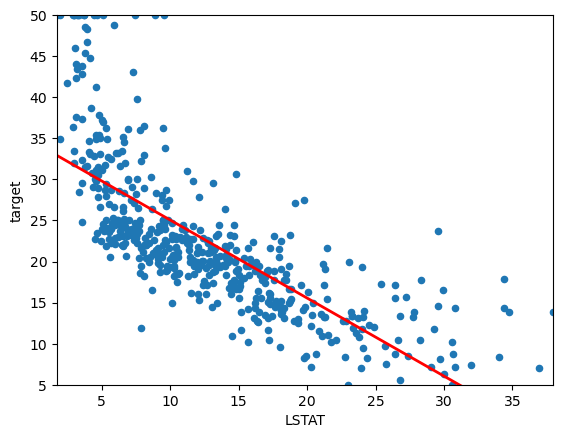

In [67]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_ine = scatter.plot(xt, linear_predictor.fit(x, y).predict(xt), '-', color='red', linewidth=2)

### 2차 변환

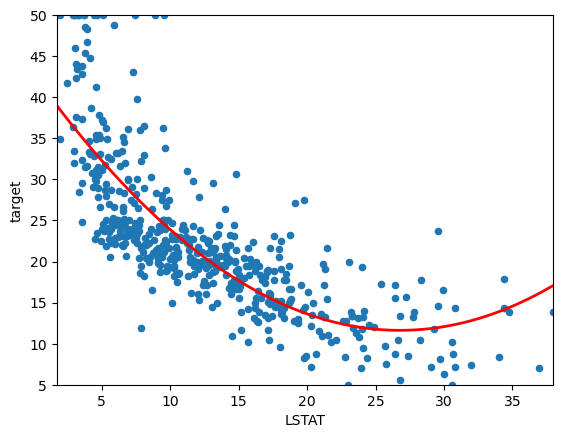

In [68]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_ine = scatter.plot(xt, quadratic_predictor.fit(x, y).predict(xt), '-', color='red', linewidth=2)

### 3차 변환

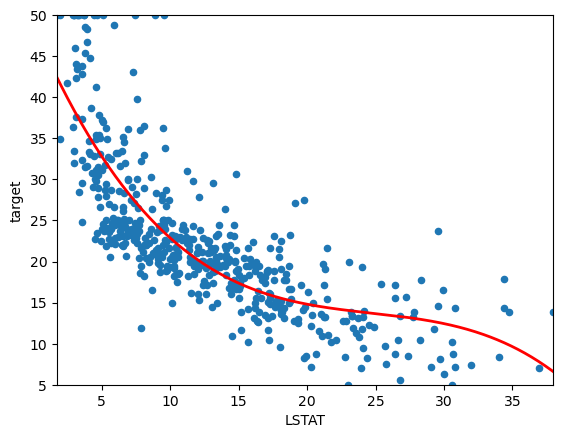

In [69]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_ine = scatter.plot(xt, cubic_predictor.fit(x, y).predict(xt), '-', color='red', linewidth=2)

In [70]:
for d in range(1, 15):   
    create_poly = PolynomialFeatures(degree=d, interaction_only=False, include_bias=False)  # 다항식 특성 변환기
    poly = make_pipeline(create_poly, StandardScaler(), linear_regression) # make_pipeline - 데이터 변환 및 모델 학습 단계 연결
    model = poly.fit(x ,y)   # 모델 학습 - 다항식 특성 생성 / 표준화 및 선형 회귀 진행
    print("R2 degress - %2i polynomial: %0.3f" % (d, r2_score(y, model.predict(x))))   # 각 차수별 R^2 점수 출력

R2 degress -  1 polynomial: 0.544
R2 degress -  2 polynomial: 0.641
R2 degress -  3 polynomial: 0.658
R2 degress -  4 polynomial: 0.673
R2 degress -  5 polynomial: 0.682
R2 degress -  6 polynomial: 0.683
R2 degress -  7 polynomial: 0.683
R2 degress -  8 polynomial: 0.684
R2 degress -  9 polynomial: 0.685
R2 degress - 10 polynomial: 0.687
R2 degress - 11 polynomial: 0.689
R2 degress - 12 polynomial: 0.689
R2 degress - 13 polynomial: 0.690
R2 degress - 14 polynomial: 0.693


##### 선형모델(1차)와 2차 다항식 사이의 결정계수가 큰 차이가 있음
##### 차수 높아질수록 결정계수 측면에서 좋은 결과 나타남

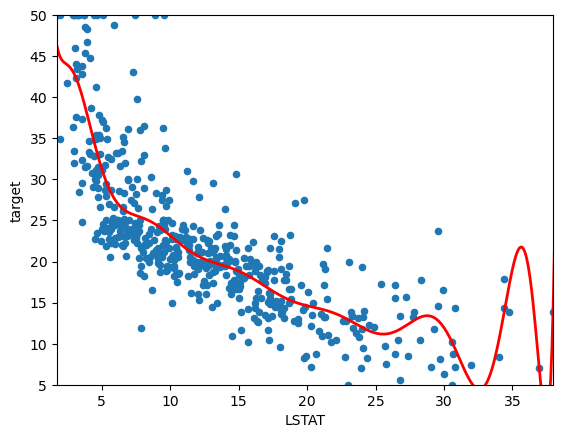

In [71]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_ine = scatter.plot(xt, model.predict(xt), '-', color='red', linewidth=2)

##### 낮은 차수의 다항식 확장에서는 매끄러운 적합성이 나타나지 않음
##### 높은 차수의 곡선은 예측변수값 범위의 가장자리에서 밀도가 약해질 때 불규칙하게 변하면서 엄격하게 점의 분포를 따르는 경향이 있음

### 과소 적합 및 과잉 적합

##### 과소 적합: 예측에 너무 적은 파라미터 사용  EX) 단순선형 회귀를 사용해 비선형 관계를 적합
##### 과잉 적합: 모델에서 학습해야 하는 파라미터를 초과
#####           파라미터가 많아질수록 적합도는 높아지나, 불규칙하고 잘못된 정보도 많아짐
#####           모델은 일반 규칙을 학습하는 것이 아니라 데이터셋 자체를 다른 형식으로 기억할 위험이 있음